# Some Neural Network Problems #

## Problem 1 ##

Consider the cell below, which selects a uniform random sample of outputs of the function $f(x,y) = x^2 - y^2$ on the region $[-1,1]x[-1,1]$. 

In [ ]:
tempX = np.random.uniform(-1,1,2000)
tempY = np.random.uniform(-1,1,2000)

myX = np.array([tempX, tempY]).T

myX[:5]

def myfunc(X):
    
    return X[:,0]**2  - X[:,1]**2

myy = myfunc(myX)

1. Produce a 3D scatter plot of the data to confirm that that $f(x,y)$ has a 'saddle point' graph.

2. Jupyter class notes for Wednesday's class are available on the [github page](https://github.com/aleahy-work/CS-STAT323-W24/tree/main/CNotes).  In them I attempt to train a two-layer model with a [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) activation function and the [ADAM optimizer](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).  The training doesn't seem to succeed, with MSE not showing a consistent declining trend.  Modify the hyperparameters of the model until you produce a model that has MSE tending to zero over 100 epochs. You should try modifying the following hyperparameters as needed:

   + Batch size
   + The number of layers
   + The number of nodes in a given layer

The last two will require changes to the Model class. You could also potentially experiment with optimizers, loss functions, and activation functions.

**Warning:** Every time you modify your Model class you have to reinitialize your model instance.  If you change your batch size, you have to reinitialize your Dataloader.

3. In my training function done in class, I gave a quick "loss.item()" MSE measure at the end of each epoch.  The book's method uses loss_hist[epoch]/len(train_dl.dataset) instead.  (See below, and note that loss_fn is [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).)  Explain the difference between the two.  (This [discussion](https://discuss.pytorch.org/t/what-is-loss-item/61218/3) may be helpful.) **Then** produce a plot of loss_hist for all epochs. 

In [ ]:
for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

4. Remember that training data is not a good estimate of model success, since neural networks tend to [overfit](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) the training data.

   + Ordinarily you would have to set aside some of the data for testing purposes, but *because of the way the data was generated* that won't be necessary.  Explain what I mean by this. Then generate a testing dataset 1/4 of the size of the training data, feed the features from this through the .forward() method of your model and use your loss function to find MSE for the testing data.  How does it compare to the MSE for your training data after 100 epochs?
   
    + You could also use the SKLearn [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to compute MSE for your testing data.  Does it work?  If it doesn't, figure out how to fix it, and compare with the answer to your previous part. 

## Problem 2 ##

Consider the function $f(x,y)$ on the region $[-1,1]\times [-1,1]$ which has value 1 in the I and III quadrant and value -1 in the II and IV quadrant.  A sample from this function is given below.   This function is discussed on apges 419-430 of the textbok and in the ch13_part1.ipynb Jupyter notebook located [at the author's github page](https://github.com/rasbt/machine-learning-book/blob/main/ch13/ch13_part1.ipynb), where he solves this problem using slightly more advanced techniques (though it still may be helpful to read).  Your task is to use this data to find a neural network which fits this function with a categorical output.  Note that:

+ You will need to use the [binary classification loss function](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
+  Given my implementation of the function, it might be advisable to use the [hyperbolic tangent function](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html) instead of the sigmoid function in the final layer.  Why?
+  The key measure of success is accuracy
+  The model should require several layers and some consideration of activation functions

You should:

1. Implement a model which outputs training accuracy at the end of each epoch.  Then test your model by generating a test dataset and testing its accuracy.

2. Once you are satisfied with the performance of your model, you should mprove on your model by generating a validation set and outputing both training and validation accuracy at each epoch.  
   

In [64]:
tempX = np.random.uniform(-1,1,250)
tempY = np.random.uniform(-1,1,250)
mynewX = np.array([tempX, tempY]).T
myy = - np.ones(250)
myy[((tempX < 0) & (tempY < 0)) | ((tempX > 0) & (tempY > 0))] = 1

In [68]:
print(mynewX[:10])
print(myy[:10])

[[-0.2100423  -0.24223176]
 [-0.84033671 -0.88252459]
 [ 0.96339307 -0.21853388]
 [-0.31139506 -0.92060703]
 [-0.39964054  0.12267476]
 [ 0.54937592 -0.82549735]
 [ 0.82110002 -0.69089501]
 [-0.7079347  -0.91307726]
 [ 0.59534633  0.32167267]
 [ 0.26634699  0.84902265]]
[ 1.  1. -1.  1. -1. -1. -1.  1.  1.  1.]


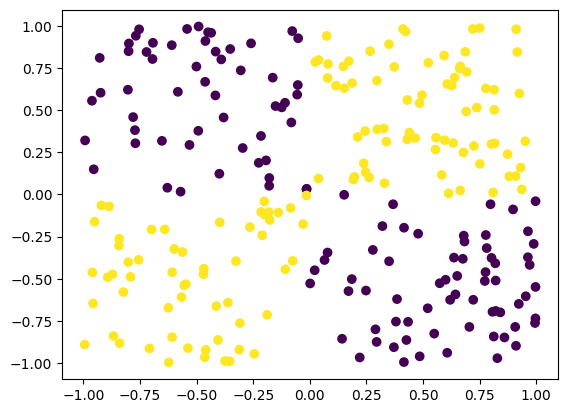

In [66]:
import matplotlib.pyplot as plt
plt.scatter(tempX, tempY, c= myy)
plt.show()